<br>
<h1 style = "font-size:30px; font-family:Papyrus ; font-weight : bold; color : #045F5F; text-align: center; border-radius: 10px 15px;"> 📚📚 Market Basket Analysis with Association Rule 🍳 </h1>
<br>


<h1 style="background-color:#FFFFFF;font-size:20px;color:#F04C8B;font-weight : bold;font-family:Papyrus">Problem Statement 🎯</h1>

In this notebook, we will learn about APRIORI algorithm which is one of the most popular algo in Association Rule Learing.

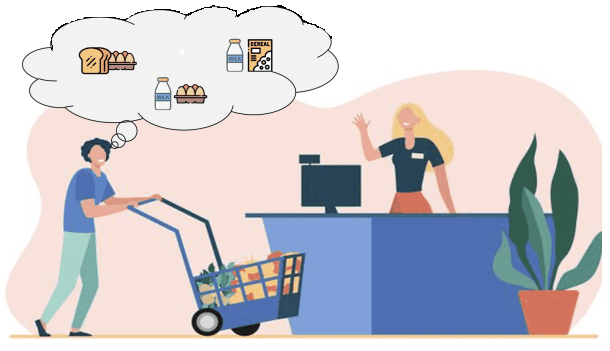

<h1 style="background-color:#FFFFFF;font-size:20px;color:#F04C8B;font-weight : bold;font-family:Papyrus">Association Rule Mining  📜📜</h1>
Association Rule is a technique to define how items are associated to each other. There are three common ways to measure Association are:

1. Support

2. Confidence

3. Lift

<h1 style="background-color:#FFFFFF;font-size:20px;color:#000000;font-weight : bold;font-family:Papyrus">1. Support</h1>

The support define about the frequently bought items or the combination of items frequently bought.
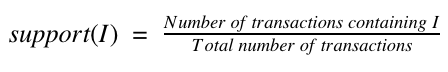

So with this, we can filter out the items that have a low frequency.

<h1 style="background-color:#FFFFFF;font-size:20px;color:#000000;font-weight : bold;font-family:Papyrus">2. Confidence</h1>

The Confidence define How often the items occur together.

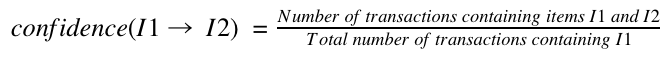

<h1 style="background-color:#FFFFFF;font-size:20px;color:#000000;font-weight : bold;font-family:Papyrus">3. Lift</h1>

Lift is the ratio between the confidence and support.


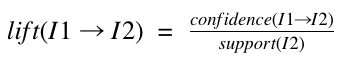


<h1 style="background-color:#FFFFFF;font-size:20px;color:#F04C8B;font-weight : bold;font-family:Papyrus">Apriori Algorithm</h1>

Apriori is an algorithm used for Association Rule Mining. It searches for a series of frequent sets of items in the datasets. It builds on associations and correlations between the itemsets. It is the algorithm behind **“You may also like”** where you commonly saw in recommendation platforms.

It is mainly used for **"Market Basket Analysis""** and helps to find those products that can be bought together.
so let's go to implementing algo, we will use bread basket dataset.

<h1 style="background-color:#FFFFFF;font-size:20px;color:#F04C8B;font-weight : bold;font-family:Papyrus">Install apyori package</h1>
Before we begin our coding we need to install the apyori package.

In [ ]:
!pip install apyori

<h1 style="background-color:#FFFFFF;font-size:20px;color:#F04C8B;font-weight : bold;font-family:Papyrus">Importing Libraries</h1>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

<h1 style="background-color:#FFFFFF;font-size:20px;color:#F04C8B;font-weight : bold;font-family:Papyrus">📌 Import Dataset 📁</h1>

In [ ]:
data=pd.read_csv('../input/the-bread-basket/bread basket.csv')  

In [ ]:
data.head()

<h1 style="background-color:#FFFFFF;font-size:20px;color:#F04C8B;font-weight : bold;font-family:Papyrus">📌 Data Preprocessing </h1>

In [ ]:
data.shape

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
msno.bar(data, color = 'purple', figsize = (10,8))  #### Check the missing values in test data

In [ ]:
data['date_time']=pd.to_datetime(data['date_time'])

In [ ]:
data['date']=data['date_time'].dt.date


In [ ]:
data['time']=data['date_time'].dt.time

In [ ]:
data['month']=data['date_time'].dt.month

data['month'] = data['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

In [ ]:
data['day']=data['date_time'].dt.weekday

data['day'] = data['day'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

In [ ]:
data['hour']=data['date_time'].dt.hour


In [ ]:
data.drop('date_time', axis = 1, inplace = True)


In [ ]:
data.head()

<h1 style="background-color:#FFFFFF;font-size:20px;color:#F04C8B;font-weight : bold;font-family:Papyrus">📌 Data Visualization  📈📊 </h1>

<h1 style="background-color:#FFFFFF;font-size:20px;color:#F04C8B;font-weight : bold;font-family:Papyrus">Transaction per hour of the day </h1>

In [ ]:
coutbyhour=data.groupby('hour')['Transaction'].count().reset_index()
coutbyhour.sort_values('hour',inplace=True)

fig = plt.figure(figsize=(12,5))
sns.barplot(x=coutbyhour['hour'], y=coutbyhour['Transaction'])
plt.xlabel('Hour')
plt.ylabel('Transaction')
plt.title('Transaction per hour of the day')
plt.show()

<h1 style="background-color:#FFFFFF;font-size:20px;color:#F04C8B;font-weight : bold;font-family:Papyrus">Transaction by Day period  </h1>

In [ ]:
coutbyweekday=data.groupby('period_day')['Transaction'].count().reset_index()
coutbyweekday.sort_values('period_day',inplace=True)

plt.figure(figsize=(12,5))
sns.countplot(data['period_day'])
plt.xlabel('period_day')
plt.ylabel('Transaction')
plt.title('Transaction by  period_day')
plt.show()

<h1 style="background-color:#FFFFFF;font-size:20px;color:#F04C8B;font-weight : bold;font-family:Papyrus">Conclusion: Most of the People prefer to order in morning and afternoon </h1>

 <h1 style="background-color:#FFFFFF;font-size:20px;color:#F04C8B;font-weight : bold;font-family:Papyrus">Transaction per day of the week</h1>

In [ ]:
coutbydayp=data.groupby('day')['Transaction'].count().reset_index()
coutbydayp.sort_values('day',inplace=True)

plt.figure(figsize=(12,5))
data['day'].value_counts(dropna = False).plot.bar(color=['darkcyan','lightblue','blue','aquamarine', 'cyan','red', 'green'])
plt.xlabel('day')
plt.ylabel('Transaction')
plt.title('Transaction per day of the week')
plt.show()




<h1 style="background-color:#FFFFFF;font-size:20px;color:#F04C8B;font-weight : bold;font-family:Papyrus">People perfer to order on saturday,friday. </h1>


<h1 style="background-color:#FFFFFF;font-size:20px;color:#F04C8B;font-weight : bold;font-family:Papyrus">Transaction by week period </h1>

In [ ]:
data['weekday_weekend'].value_counts()

In [ ]:
size = [12807, 7700]
labels = "weekday", "weekend"
colors = ["cyan", "lightblue"]
explode = [0, 0.1]


plt.figure(figsize=(12,5))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.xlabel('weekday_weekend')
plt.ylabel('Transaction')
plt.title('Transaction by week period')
plt.show()

<h1 style="background-color:#FFFFFF;font-size:20px;color:#F04C8B;font-weight : bold;font-family:Papyrus">People prefer to order in weekdays </h1>

<h1 style="background-color:#FFFFFF;font-size:20px;color:#F04C8B;font-weight : bold;font-family:Papyrus">Transaction by Month </h1>

In [ ]:
coutbymonth=data.groupby('month')['Transaction'].count().reset_index()
coutbymonth.sort_values('month',inplace=True)

fig = plt.figure(figsize=(12,5))
sns.barplot(x=coutbymonth['month'], y=coutbymonth['Transaction'])
plt.xlabel('month')
plt.ylabel('Transaction')
plt.title('Transaction per month')
plt.show()

<h1 style="background-color:#FFFFFF;font-size:20px;color:#F04C8B;font-weight : bold;font-family:Papyrus">Top sold product </h1>

In [ ]:
fig = plt.figure(figsize=(15,5))

names = data.Item.value_counts().head(25).index
values = data.Item.value_counts().head(25)
sns.barplot(x = names, y = values)
plt.xticks(rotation=45)

<h1 style="background-color:#FFFFFF;font-size:20px;color:#F04C8B;font-weight : bold;font-family:Papyrus">Top sold items were: Coffee, Bread, Tea

items with least sell:Tiffin,Jam</h1>

<h1 style="background-color:#FFFFFF;font-size:20px;color:#F04C8B;font-weight : bold;font-family:Papyrus">📌Apriori Algorithm </h1>

In [ ]:
from mlxtend.frequent_patterns import association_rules, apriori


In [ ]:
transactions = data.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions

In [ ]:
# making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not
table = transactions.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)

In [ ]:
table.head()

In [ ]:
# making a function which returns 0 or 1
# 0 means item was not in that transaction, 1 means item present in that transaction
def hot_encode(x): 
    if(x==0): 
        return 0
    if(x>0): 
        return 1

In [ ]:
# applying the function to the dataset
final_table=table.applymap(hot_encode)

In [ ]:
final_table.head()

In [ ]:
# using the 'apriori algorithm' with min_support=0.01 (1% of 9465)
# It means the item should be present in atleast 94 transaction out of 9465 transactions only when we considered that item in
# frequent itemset
frequence = apriori(final_table, min_support=0.015, use_colnames=True)
rules = association_rules(frequence, metric="lift", min_threshold=1)

In [ ]:
# now making the rules from frequent itemset generated above
rules.sort_values('confidence', ascending = False, inplace=True)
rules

In [ ]:
# arranging the data from highest to lowest with respect to 'confidence'

rules.sort_values('confidence', ascending=False)

<h1 style="background-color:#FFFFFF;font-size:20px;color:#F04C8B;font-weight : bold;font-family:Papyrus">As per the above table we can analyse that coffee is an item that is very associated with other purched items in the bakery, such as toast,medialuana and pastry.</h1>

<h1 style="background-color:#FFFFFF;font-size:20px;color:#F04C8B;font-weight : bold;font-family:Papyrus">If you find it is helpful,upvote it  👍 
Hope you enjoy!!!   Happy Learning :)

Thank you. 😊</h1>